In [13]:
from ensemble_functions import *

In [14]:
import h5py

In [15]:
ensemble_data = load("ensemble_1_complete.joblib")

In [4]:
print(ensemble_data)

{'ensemble': {'models': {'lstm': <keras.src.engine.sequential.Sequential object at 0x000001E2166A6C10>, 'rf': {'Bronx': RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=150,
                      random_state=42), 'Brooklyn': RandomForestRegressor(min_samples_split=5, n_estimators=200, random_state=42), 'Manhattan': RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42), 'Queens': RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42), 'Staten Island': RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=200,
                      random_state=42)}, 'xgb': {'Bronx': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             in

Ahora vamos a guardar en vez de joblib, h5py:

In [6]:
lstm_model = ensemble_data['ensemble']['models']['lstm']

In [7]:
lstm_model.save('lstm_model.h5')

In [5]:
import copy

In [16]:
nuevo_ensemble = copy.deepcopy(ensemble_data)

INFO:tensorflow:Assets written to: C:\Users\alter\AppData\Local\Temp\tmpzzq9z0ma\assets


INFO:tensorflow:Assets written to: C:\Users\alter\AppData\Local\Temp\tmpzzq9z0ma\assets


In [9]:
import keras

In [27]:
# Ruta del archivo h5
model_path = 'lstm_model.h5'

# Cargar el modelo h5
model = keras.models.load_model(model_path)

In [28]:
nuevo_ensemble['ensemble']['models']['lstm'] = model

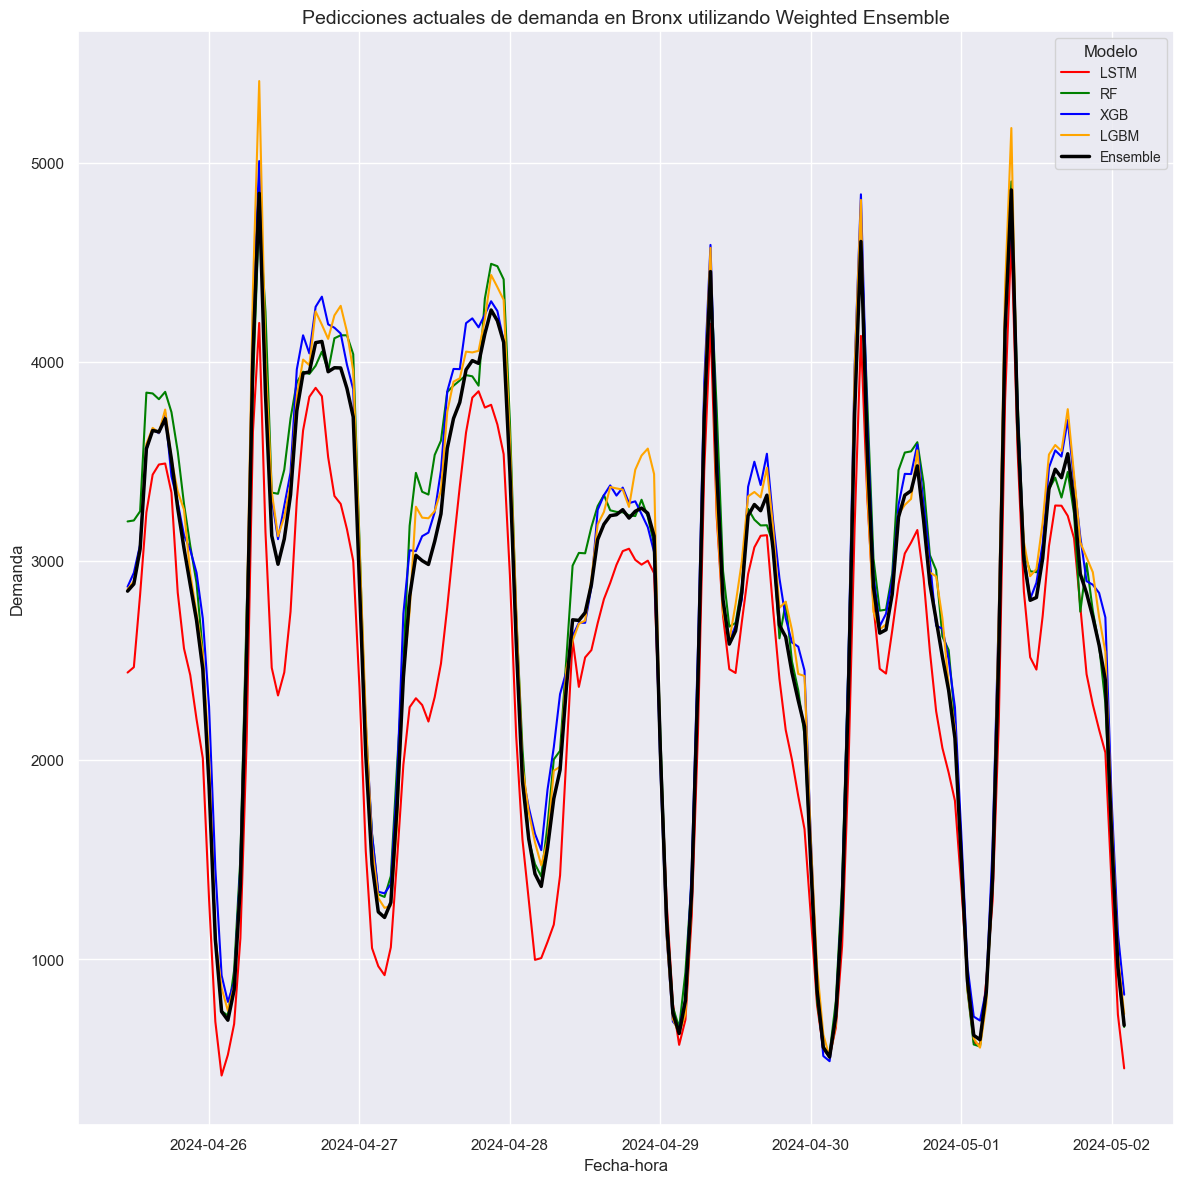

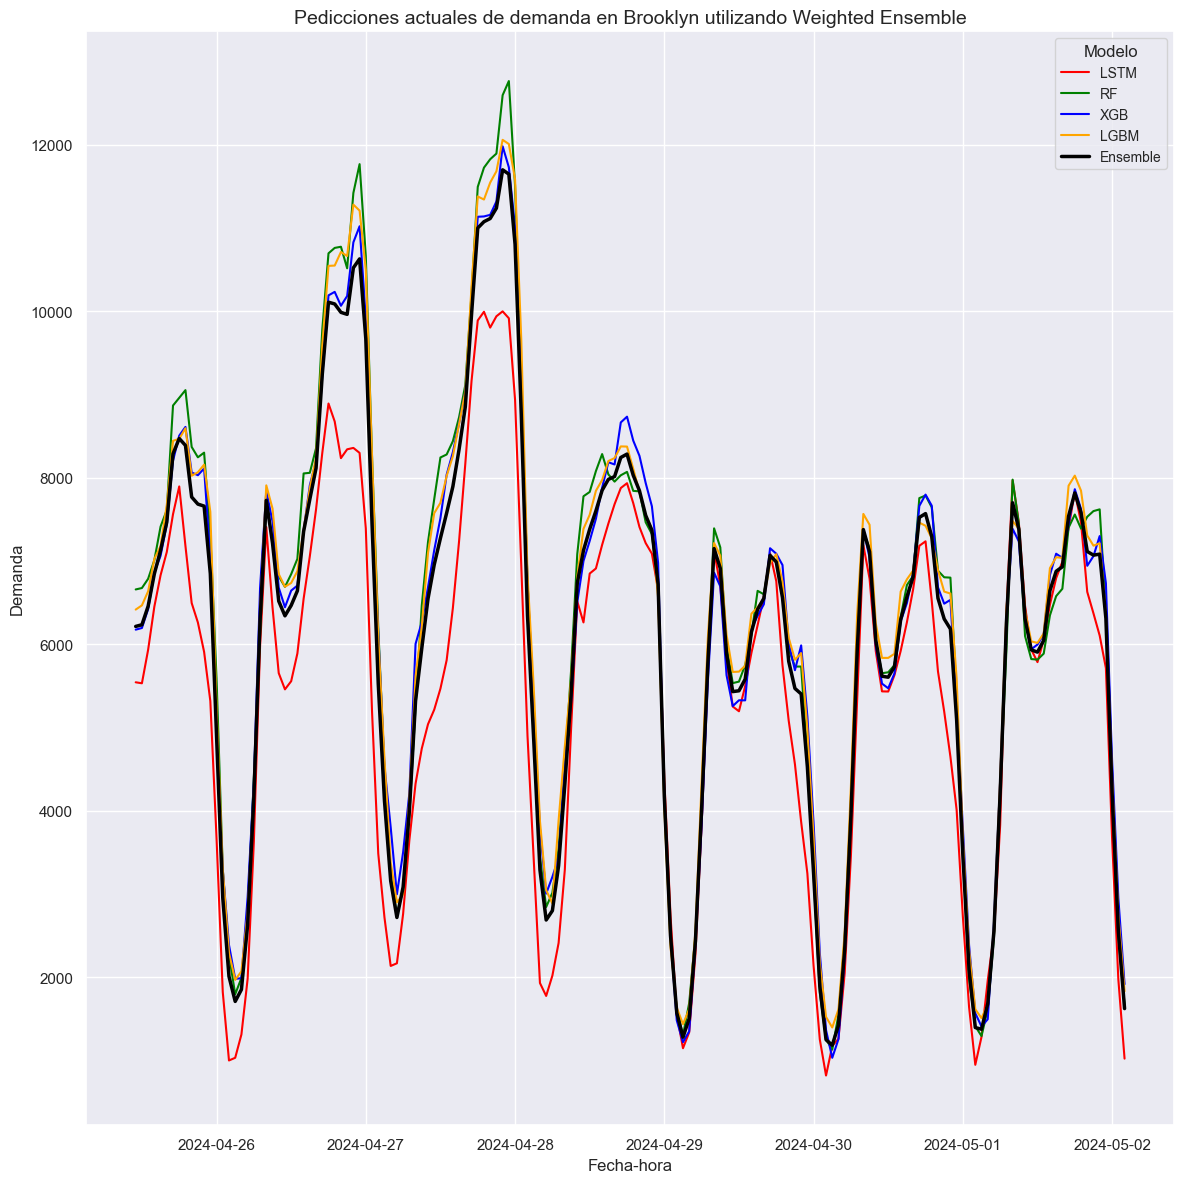

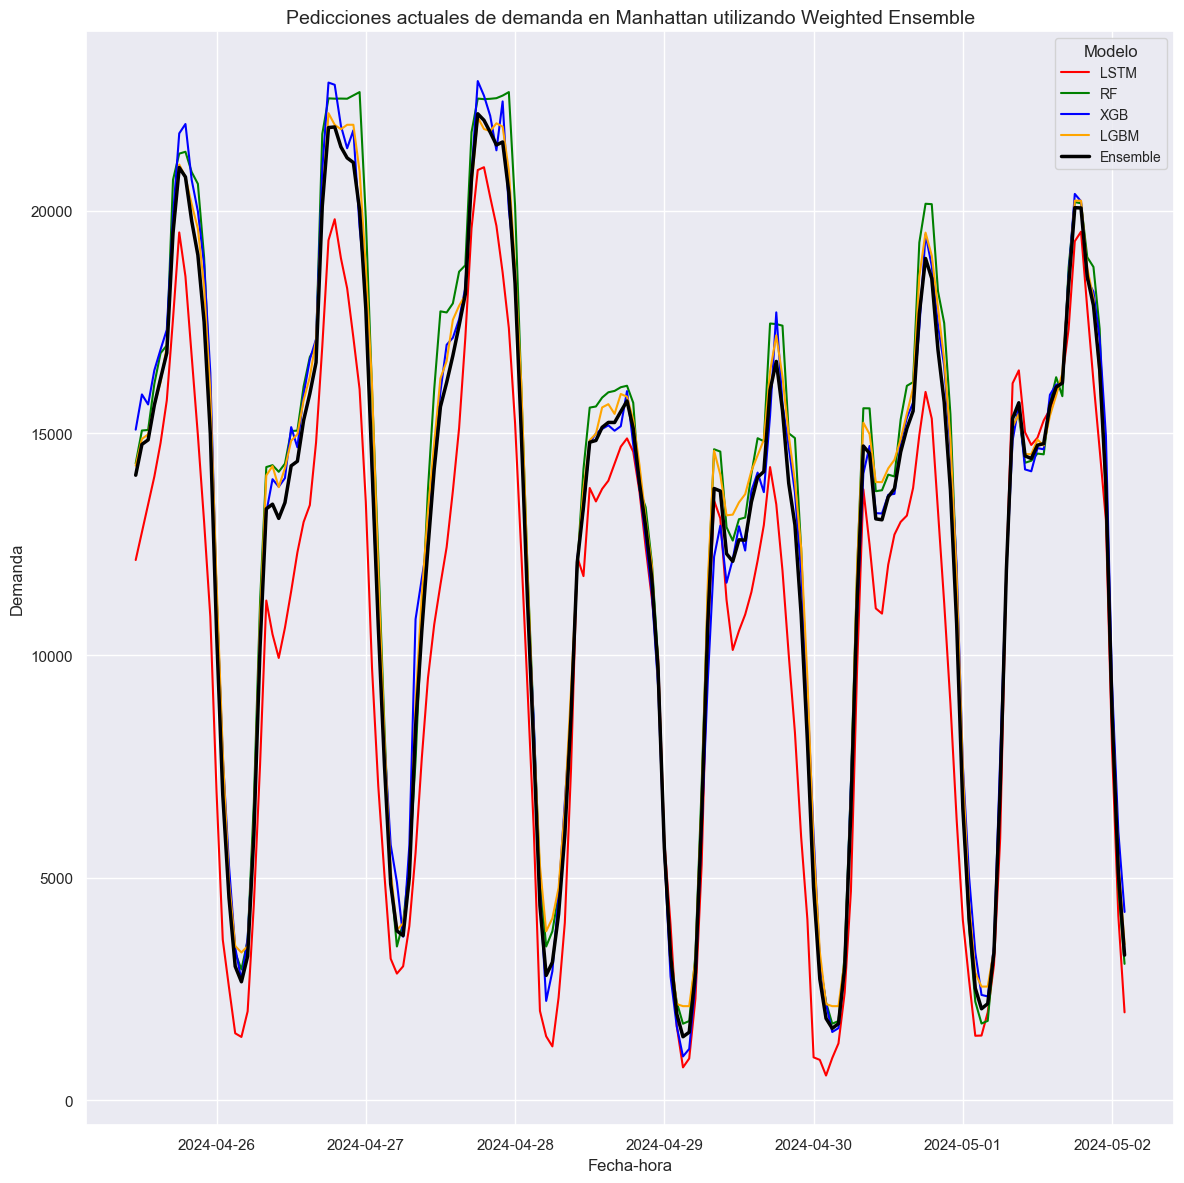

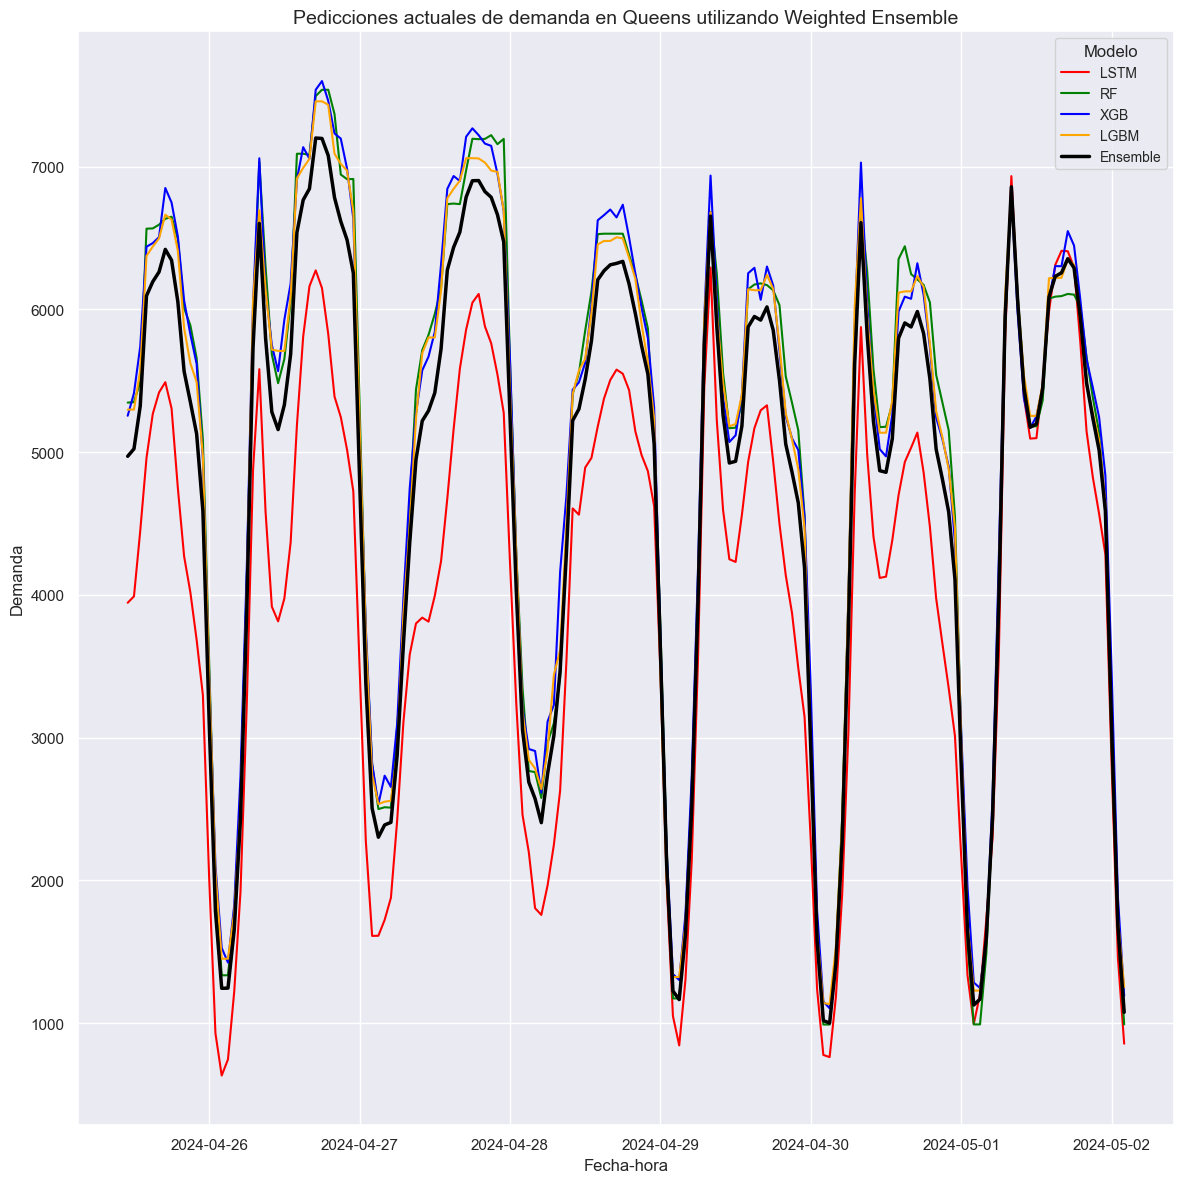

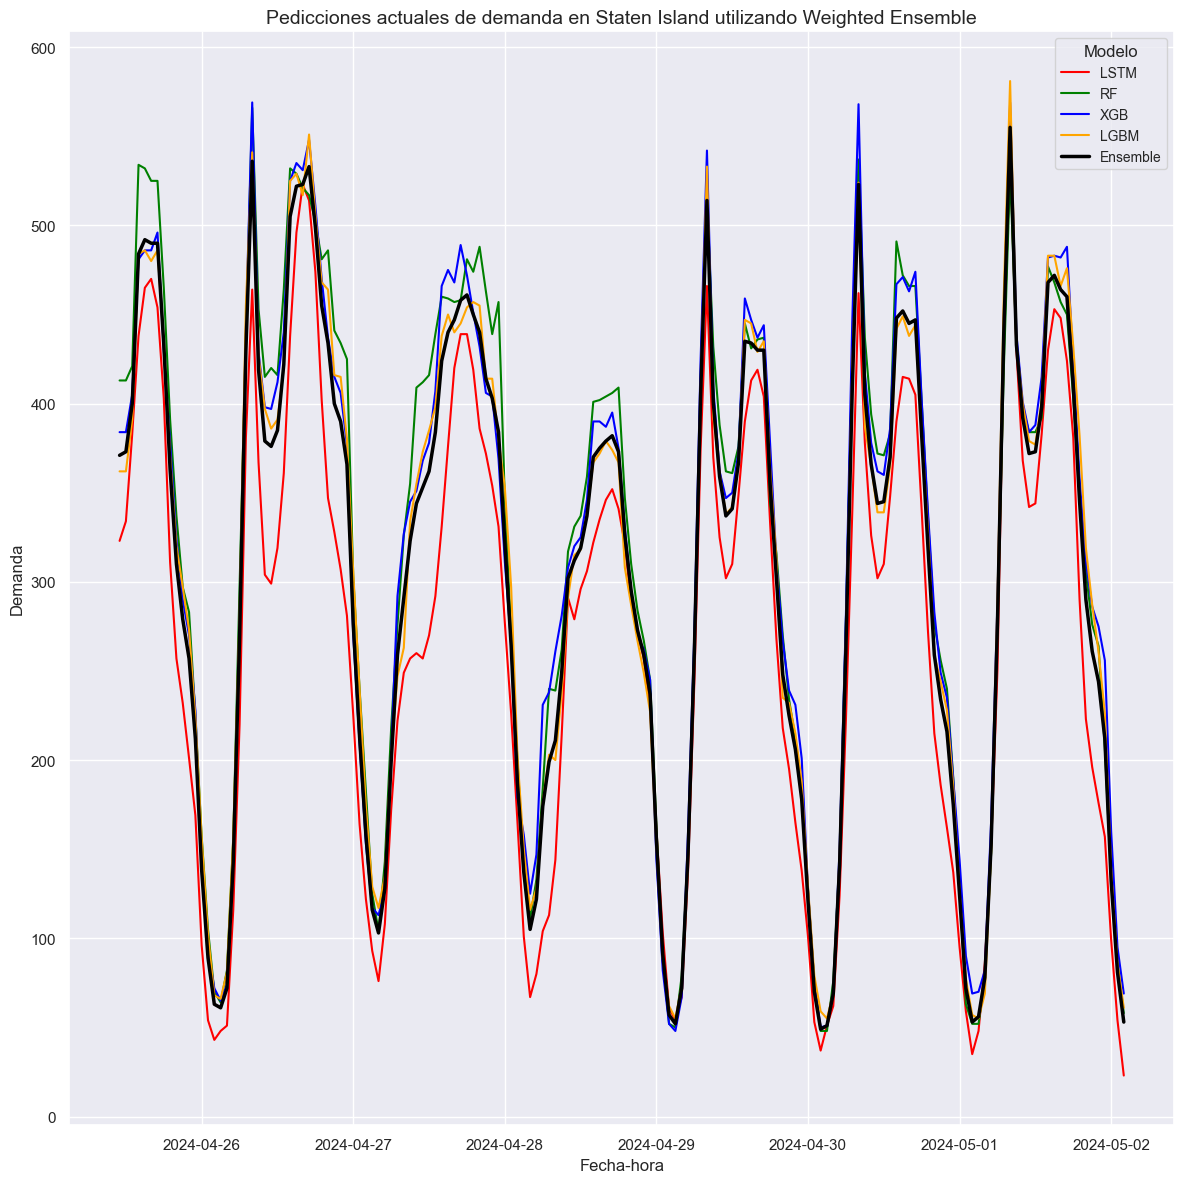

In [17]:
nyc_pred = predecir(nuevo_ensemble['ensemble'], ponderacion='lineal')
graficar_predicciones(nyc_pred)

In [17]:
import copy

In [18]:
ensemble_sin_lstm = copy.deepcopy(nuevo_ensemble)
del ensemble_sin_lstm['ensemble']['models']['lstm']

INFO:tensorflow:Assets written to: C:\Users\alter\AppData\Local\Temp\tmpg2khkydp\assets


INFO:tensorflow:Assets written to: C:\Users\alter\AppData\Local\Temp\tmpg2khkydp\assets


In [19]:
#del ensemble_sin_lstm['ensemble_errors']
del ensemble_sin_lstm['ensemble_predictions']

In [20]:
del ensemble_sin_lstm['ensemble']['errors']
del ensemble_sin_lstm['ensemble']['lstm_data']['history']
del ensemble_sin_lstm['ensemble']['test_predictions']

Cambiar la clave 'lineal' de ensebmble errors a 'lin'

In [21]:
ensemble_sin_lstm['ensemble_errors']

{'lineal': {'Bronx': {'MSE': 170156.152043441,
   'RMSE': 412.4998812647599,
   'NRMSE': 0.1420751259694899},
  'Brooklyn': {'MSE': 854259.6527579308,
   'RMSE': 924.261679806066,
   'NRMSE': 0.13978613951745064},
  'Manhattan': {'MSE': 2987611.8102314947,
   'RMSE': 1728.4709457296337,
   'NRMSE': 0.13556323705603826},
  'Queens': {'MSE': 512011.17605030007,
   'RMSE': 715.549562259876,
   'NRMSE': 0.13180747600601952},
  'Staten Island': {'MSE': 4529.963989711346,
   'RMSE': 67.30500716671342,
   'NRMSE': 0.18923675390271735}},
 'exp': {0.001: {'Bronx': {'MSE': 170196.12432123465,
    'RMSE': 412.54832967936574,
    'NRMSE': 0.14209181279758556},
   'Brooklyn': {'MSE': 850325.0182909403,
    'RMSE': 922.130694799246,
    'NRMSE': 0.13946384749346946},
   'Manhattan': {'MSE': 3140042.612460703,
    'RMSE': 1772.016538427535,
    'NRMSE': 0.13897849926813138},
   'Queens': {'MSE': 509238.11774792796,
    'RMSE': 713.6092192144997,
    'NRMSE': 0.13145005601321127},
   'Staten Island': 

In [11]:
archivo = 'ensemble_1_sin_lstm.joblib'
dump(ensemble_sin_lstm, archivo)

['ensemble_1_sin_lstm.joblib']

In [12]:
import tarfile

# Nombre del archivo a comprimir
nombre_archivo_joblib = "ensemble_1_sin_lstm.joblib"

# Nombre del archivo tar.gz comprimido
nombre_archivo_comprimido = "../../Streamlit/data/ensemble_1_sin_lstm.tar.gz"

# Abrir el archivo tar.gz en modo de escritura con compresión gzip
with tarfile.open(nombre_archivo_comprimido, "w:gz") as tar:
    # Agregar el archivo .joblib al archivo tar.gz
    tar.add(nombre_archivo_joblib)


print(f"Archivo {nombre_archivo_joblib} comprimido como {nombre_archivo_comprimido}")


Archivo ensemble_1_sin_lstm.joblib comprimido como ../../Streamlit/data/ensemble_1_sin_lstm.tar.gz


In [38]:
ensemble_sin_lstm['ponderacion']

{'tipo': 'lineal', 'alpha': 1}

In [39]:
ensemble_sin_lstm = load('ensemble_1_sin_lstm.joblib')

In [40]:
ensemble_sin_lstm['ponderacion']

{'tipo': 'lineal', 'alpha': 1}

In [41]:
ensemble_sin_lstm.keys()

dict_keys(['ensemble', 'ponderacion'])

In [42]:
ensemble_sin_lstm['ensemble']

{'models': {'rf': {'Bronx': RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=150,
                         random_state=42),
   'Brooklyn': RandomForestRegressor(min_samples_split=5, n_estimators=200, random_state=42),
   'Manhattan': RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42),
   'Queens': RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42),
   'Staten Island': RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=200,
                         random_state=42)},
  'xgb': {'Bronx': XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.5, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.05, max_bin=N